In [ ]:
#download from google drive
!gdown 1N198axZA9a48JBnO20hjrNGA6YH81qaT

Downloading...
From: https://drive.google.com/uc?id=1N198axZA9a48JBnO20hjrNGA6YH81qaT
To: /content/t2_tse_cor_train.zip
100% 199M/199M [00:01<00:00, 171MB/s]


In [ ]:
#unzip folder
!unzip /content/t2_tse_cor_train.zip

Archive:  /content/t2_tse_cor_train.zip
  inflating: t2_tse_cor_dcm/False_c/2789.dcm.png  
  inflating: t2_tse_cor_dcm/True_c/2014.dcm.png  
  inflating: t2_tse_cor_dcm/False_c/1400.dcm.png  
  inflating: t2_tse_cor_dcm/False_c/337.dcm.png  
  inflating: t2_tse_cor_dcm/True_c/2634.dcm.png  
  inflating: t2_tse_cor_dcm/False_c/909.dcm.png  
  inflating: t2_tse_cor_dcm/False_c/545.dcm.png  
  inflating: t2_tse_cor_dcm/True_c/887.dcm.png  
  inflating: t2_tse_cor_dcm/False_c/1758.dcm.png  
  inflating: t2_tse_cor_dcm/True_c/1797.dcm.png  
  inflating: t2_tse_cor_dcm/False_c/2571.dcm.png  
  inflating: t2_tse_cor_dcm/True_c/630.dcm.png  
  inflating: t2_tse_cor_dcm/False_c/2142.dcm.png  
  inflating: t2_tse_cor_dcm/False_c/2005.dcm.png  
  inflating: t2_tse_cor_dcm/True_c/2016.dcm.png  
  inflating: t2_tse_cor_dcm/True_c/530.dcm.png  
  inflating: t2_tse_cor_dcm/False_c/1533.dcm.png  
  inflating: t2_tse_cor_dcm/True_c/218.dcm.png  
  inflating: t2_tse_cor_dcm/False_c/908.dcm.png  
  infla

In [ ]:
#download from google drive
!gdown 1webeyalif3dUt7Bxxk-IIRZeZsTIi4Hc

Downloading...
From: https://drive.google.com/uc?id=1webeyalif3dUt7Bxxk-IIRZeZsTIi4Hc
To: /content/test_t2_cor_test.zip
100% 160M/160M [00:03<00:00, 46.1MB/s]


In [ ]:
#unzip folder
!unzip /content/test_t2_cor_test.zip

Archive:  /content/test_t2_cor_test.zip
  inflating: test_t2_cor/test_t2_tse_cor_dcm/1189.dcm.png  
  inflating: test_t2_cor/test_t2_tse_cor_dcm/1631.dcm.png  
  inflating: test_t2_cor/test_t2_tse_cor_dcm/1057.dcm.png  
  inflating: test_t2_cor/test_t2_tse_cor_dcm/1400.dcm.png  
  inflating: test_t2_cor/test_t2_tse_cor_dcm/630.dcm.png  
  inflating: test_t2_cor/test_t2_tse_cor_dcm/733.dcm.png  
  inflating: test_t2_cor/test_t2_tse_cor_dcm/909.dcm.png  
  inflating: test_t2_cor/test_t2_tse_cor_dcm/2000.dcm.png  
  inflating: test_t2_cor/test_t2_tse_cor_dcm/155.dcm.png  
  inflating: test_t2_cor/test_t2_tse_cor_dcm/487.dcm.png  
  inflating: test_t2_cor/test_t2_tse_cor_dcm/791.dcm.png  
  inflating: test_t2_cor/test_t2_tse_cor_dcm/1533.dcm.png  
  inflating: test_t2_cor/test_t2_tse_cor_dcm/2005.dcm.png  
  inflating: test_t2_cor/test_t2_tse_cor_dcm/808.dcm.png  
  inflating: test_t2_cor/test_t2_tse_cor_dcm/1921.dcm.png  
  inflating: test_t2_cor/test_t2_tse_cor_dcm/472.dcm.png  
  inflat

In [ ]:
import os
import numpy as np
import torch
from torch.utils.data import DataLoader, random_split
import torchvision
import torchvision.transforms as T
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid, save_image
import matplotlib.pyplot as plt

In [ ]:
#CNN algorithms works with Nvidia Cuda
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
#train images path
prx_train_c = "/content/t2_tse_cor_dcm"
listdir = sorted(os.listdir(prx_train_c))
print(listdir)
#test images path
prx_test_c = "/content/test_t2_cor"

['False_c', 'True_c']


In [ ]:
#imagenet values for normalization
imagn_std = ([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

#image resize
size = 224
#batchsize variable
batch_size=16
#works with RGB so, 3 channels
channels = 3

In [ ]:
#image transforming phase 5 different transforming compesed
image_transforms = T.Compose([
    T.Resize(size),
    T.CenterCrop(size),
    T.ToTensor(),
    T.Normalize(*imagn_std),
    T.transforms.GaussianBlur(kernel_size=5, sigma=(0.1, 2.0))
])

In [ ]:
#images are uploading to image folder
prx_train_data = ImageFolder(prx_train_c, transform=image_transforms)
#classes needs for classification
classes = prx_train_data.classes
#show which class
class_dict = prx_train_data.class_to_idx


len(prx_train_data), prx_train_data[0][0].size()

(2888, torch.Size([3, 224, 224]))

In [ ]:
classes

['False_c', 'True_c']

In [ ]:
class_dict

{'False_c': 0, 'True_c': 1}

In [ ]:
#to always work the same, 42 is not important
torch.manual_seed(42)

#train validation split for %15 validation set
num_val = int(len(prx_train_data) * 0.15)

prx_train_data, prx_val_data = random_split(prx_train_data, [len(prx_train_data) - num_val, num_val])

In [ ]:
#train and valitation sets defined for dataloader
ptrainl = DataLoader(prx_train_data, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=2)
pvall = DataLoader(prx_train_data, batch_size=batch_size, shuffle=False, pin_memory=False, num_workers=2)
#ptestl = DataLoader(prx_test_data, batch_size=batch_size, shuffle=False, pin_memory=False, num_workers=2)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
from torchsummary import summary
from glob import glob
from tqdm.notebook import tqdm

In [ ]:
#variable in how many steps the model will run
epochs = 10

In [ ]:
#model training function
def tr_func(epoch, epochs, model, ptrainl, loss_func, device, optimization, data_set=prx_train_data):
    model.train(True)
    torch.set_grad_enabled(True)
    model_epoch_loss, model_epochs_accuracy = 0.00, 0.00
    progress = tqdm(ptrainl, total=len(ptrainl))
    for img, cancer_s in progress:
        img = img.to(device)
        cancer_s = cancer_s.to(device)
        optimization.zero_grad()
        output = model(img)
        _, prediction = torch.max(output, 1)
        training_loss = loss_func(output, cancer_s)
        training_loss.backward()
        optimization.step()
        model_epoch_loss += training_loss.item()
        model_epochs_accuracy += torch.sum(prediction == cancer_s).item()
        progress.set_description(f'epoch ---{epoch + 1}/{epochs}---')
        progress.set_postfix_str('training loss = {:.4f}'.format(training_loss.item()))

    model_epoch_loss = model_epoch_loss / len(ptrainl)
    model_epochs_accuracy = model_epochs_accuracy / len(data_set)

    return model_epoch_loss, model_epochs_accuracy

In [ ]:
#model validation function
def vl_func(model, ptrainl, loss_func, device, data_set=prx_train_data):
    model.train(False)
    model_epoch_loss, model_epochs_accuracy = 0.00, 0.00
    progress = tqdm(ptrainl, total=len(ptrainl), leave=False)
    for img, cancer_s in progress:
        img = img.to(device)
        cancer_s = cancer_s.to(device)
        output = model(img)
        _, prediction = torch.max(output, 1)
        evaluation_loss = loss_func(output, cancer_s)
        model_epoch_loss += evaluation_loss.item()
        model_epochs_accuracy += torch.sum(prediction == cancer_s).item()
        progress.set_description(f'model evaluation')

    model_epoch_loss = model_epoch_loss / len(ptrainl)
    model_epochs_accuracy = model_epochs_accuracy / len(data_set)

    return model_epoch_loss, model_epochs_accuracy

In [ ]:
#model run function
def fit(epochs, model, t_loader, v_loader, loss_func, device, optimization):

    history = []
    for epoch in range(epochs):
        torch.cuda.empty_cache()
        training_loss, training_accuracy = tr_func(epoch, epochs, model, t_loader, loss_func, device, optimization)
        torch.cuda.empty_cache()
        validation_loss, validation_accuracy = vl_func(model, v_loader, loss_func, device)
        history.append({'training loss': training_loss, 'training accuracy': training_accuracy, 'validation loss': validation_loss, 'validation accuracy': validation_accuracy})
        metric = "[training loss]={:.4f} - [training accuracy]={:.4f} - [validation loss]={:.4f} - [validation accuracy]={:.4f}".format(training_loss, training_accuracy, validation_loss, validation_accuracy,)
        print(metric)
    return history

In [ ]:
#plotting loss
def losses_graph(history):
    losses = [fit_results['training loss'] for fit_results in history]
    val_losses = [fit_results['validation loss'] for fit_results in history]
    graph,ax = plt.subplots(1,1,figsize = (10, 8))
    ax.grid('on')
    ax.plot(losses, label = 'Loss')
    ax.plot(val_losses, label = 'Validation Loss')
    ax.set_xlim(left=1, right=len(losses))
    ax.legend();
    graph.show()

In [ ]:
#plotting accuracy
def accuracy_graph(history):
    accuracy = [fit_results['training accuracy'] for fit_results in history]
    val_accuracy = [fit_results['validation accuracy'] for fit_results in history]
    graph,ax = plt.subplots(1,1,figsize = (10, 8))
    ax.grid('on')
    ax.plot(100 * np.array(accuracy), label = 'Accuracy')
    ax.plot(100 * np.array(val_accuracy), label = 'Validation Accuracy')
    ax.set_xlim(left=1, right=len(accuracy))
    ax.legend();
    graph.show()

In [ ]:
#model selection
resnet18 = models.resnet18(pretrained=True).to(device)
#resnet18

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 166MB/s]


In [ ]:
#adam selected for low memory, learning rate is default
resnet18_optimization = torch.optim.Adam(resnet18.parameters(), lr=0.001)

In [ ]:
#training
%%time
resnet18_fit_results = fit(epochs, resnet18, ptrainl, pvall, nn.CrossEntropyLoss(), device, resnet18_optimization)

  0%|          | 0/154 [00:00<?, ?it/s]

  0%|          | 0/154 [00:00<?, ?it/s]

[training loss]=0.6846 - [training accuracy]=0.7935 - [validation loss]=0.3394 - [validation accuracy]=0.8517


  0%|          | 0/154 [00:00<?, ?it/s]

  0%|          | 0/154 [00:00<?, ?it/s]

[training loss]=0.2350 - [training accuracy]=0.9047 - [validation loss]=0.2241 - [validation accuracy]=0.9035


  0%|          | 0/154 [00:00<?, ?it/s]

  0%|          | 0/154 [00:00<?, ?it/s]

[training loss]=0.1353 - [training accuracy]=0.9479 - [validation loss]=0.1036 - [validation accuracy]=0.9576


  0%|          | 0/154 [00:00<?, ?it/s]

  0%|          | 0/154 [00:00<?, ?it/s]

[training loss]=0.0942 - [training accuracy]=0.9674 - [validation loss]=0.0448 - [validation accuracy]=0.9813


  0%|          | 0/154 [00:00<?, ?it/s]

  0%|          | 0/154 [00:00<?, ?it/s]

[training loss]=0.0468 - [training accuracy]=0.9817 - [validation loss]=0.0104 - [validation accuracy]=0.9959


  0%|          | 0/154 [00:00<?, ?it/s]

  0%|          | 0/154 [00:00<?, ?it/s]

[training loss]=0.0428 - [training accuracy]=0.9845 - [validation loss]=0.0545 - [validation accuracy]=0.9817


  0%|          | 0/154 [00:00<?, ?it/s]

  0%|          | 0/154 [00:00<?, ?it/s]

[training loss]=0.0706 - [training accuracy]=0.9772 - [validation loss]=0.0096 - [validation accuracy]=0.9980


  0%|          | 0/154 [00:00<?, ?it/s]

  0%|          | 0/154 [00:00<?, ?it/s]

[training loss]=0.0260 - [training accuracy]=0.9898 - [validation loss]=0.0117 - [validation accuracy]=0.9967


  0%|          | 0/154 [00:00<?, ?it/s]

  0%|          | 0/154 [00:00<?, ?it/s]

[training loss]=0.0169 - [training accuracy]=0.9963 - [validation loss]=0.0013 - [validation accuracy]=1.0000


  0%|          | 0/154 [00:00<?, ?it/s]

  0%|          | 0/154 [00:00<?, ?it/s]

[training loss]=0.0239 - [training accuracy]=0.9931 - [validation loss]=0.1426 - [validation accuracy]=0.9405
CPU times: user 1min 21s, sys: 11.6 s, total: 1min 32s
Wall time: 5min 29s


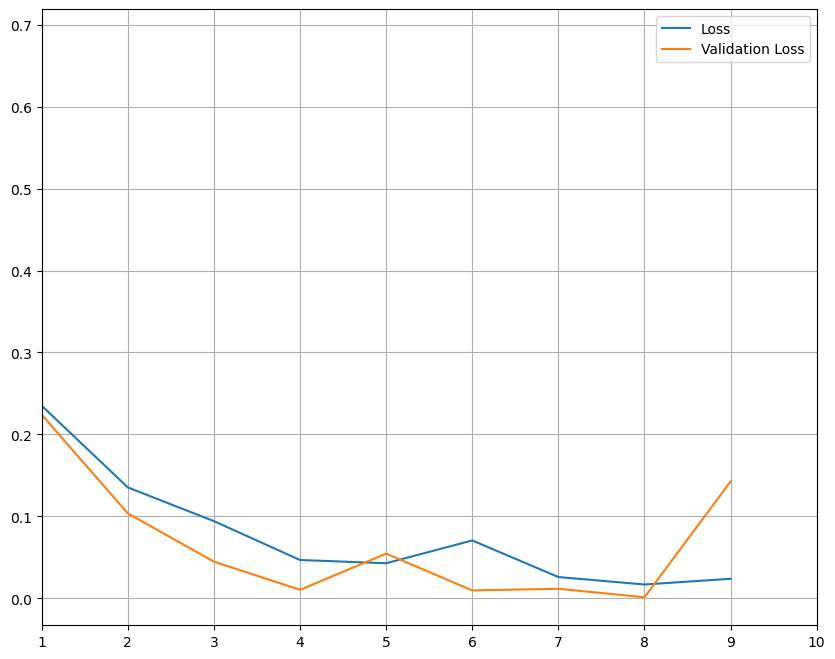

In [ ]:
losses_graph(resnet18_fit_results)

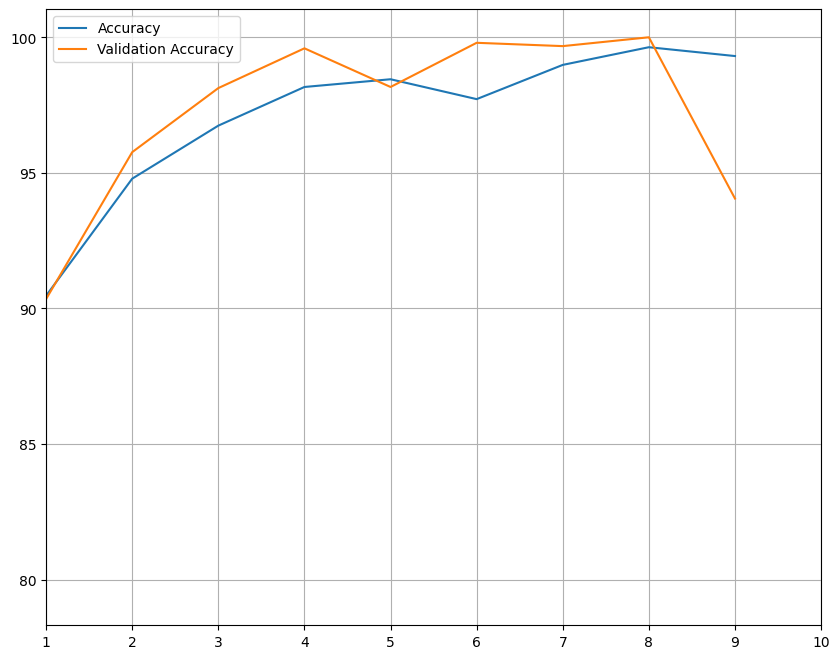

In [ ]:
accuracy_graph(resnet18_fit_results)

In [ ]:
#prediction with validation set
y_test, y_pred = [], []
for all_img, all_cancer_s in tqdm(pvall):
    all_img = all_img.to(device)
    all_outputs = resnet18(all_img)
    _, prediction = torch.max(all_outputs, dim = 1)
    y_test += all_cancer_s.tolist()
    y_pred += prediction.tolist()

  0%|          | 0/154 [00:00<?, ?it/s]

In [ ]:
#loss and accuracy metrics
loss, acc = vl_func(resnet18, pvall, nn.CrossEntropyLoss(), device)
print(f'training loss: {loss} - training accuracy: {acc}')

  0%|          | 0/154 [00:00<?, ?it/s]

training loss: 0.143089915720244 - training accuracy: 0.9437881873727088


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import seaborn as sns

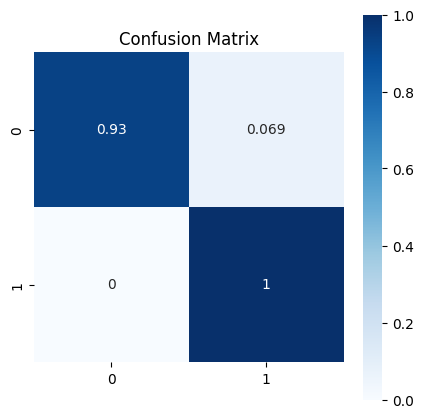

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred, normalize = 'true')
cm_df = pd.DataFrame(cm)
plt.figure(figsize=(5, 5))
plt.title('Confusion Matrix')
sns.heatmap(cm_df, annot=True, cmap='Blues', square=True);

In [ ]:
#f1 score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1941
           1       0.79      1.00      0.88       514

    accuracy                           0.95      2455
   macro avg       0.90      0.97      0.92      2455
weighted avg       0.96      0.95      0.95      2455



In [ ]:
#model selection
densenet121 = models.densenet121(pretrained=True).to(device)
#densenet121

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 200MB/s]


In [ ]:
#adam selected for low memory, learning rate is default
densenet121_optimization = torch.optim.Adam(densenet121.parameters(), lr=0.0005)

In [ ]:
#training
%%time
densenet121_fit_results = fit(epochs, densenet121, ptrainl, pvall, nn.CrossEntropyLoss(), device, densenet121_optimization)

  0%|          | 0/154 [00:00<?, ?it/s]

  0%|          | 0/154 [00:00<?, ?it/s]

[training loss]=0.7712 - [training accuracy]=0.7967 - [validation loss]=0.1224 - [validation accuracy]=0.9536


  0%|          | 0/154 [00:00<?, ?it/s]

  0%|          | 0/154 [00:00<?, ?it/s]

[training loss]=0.1939 - [training accuracy]=0.9259 - [validation loss]=0.1140 - [validation accuracy]=0.9633


  0%|          | 0/154 [00:00<?, ?it/s]

  0%|          | 0/154 [00:00<?, ?it/s]

[training loss]=0.1190 - [training accuracy]=0.9556 - [validation loss]=0.0683 - [validation accuracy]=0.9784


  0%|          | 0/154 [00:00<?, ?it/s]

  0%|          | 0/154 [00:00<?, ?it/s]

[training loss]=0.0743 - [training accuracy]=0.9703 - [validation loss]=0.0278 - [validation accuracy]=0.9882


  0%|          | 0/154 [00:00<?, ?it/s]

  0%|          | 0/154 [00:00<?, ?it/s]

[training loss]=0.0773 - [training accuracy]=0.9743 - [validation loss]=0.0327 - [validation accuracy]=0.9882


  0%|          | 0/154 [00:00<?, ?it/s]

  0%|          | 0/154 [00:00<?, ?it/s]

[training loss]=0.0551 - [training accuracy]=0.9800 - [validation loss]=0.0957 - [validation accuracy]=0.9593


  0%|          | 0/154 [00:00<?, ?it/s]

  0%|          | 0/154 [00:00<?, ?it/s]

[training loss]=0.0574 - [training accuracy]=0.9747 - [validation loss]=0.0455 - [validation accuracy]=0.9821


  0%|          | 0/154 [00:00<?, ?it/s]

  0%|          | 0/154 [00:00<?, ?it/s]

[training loss]=0.0406 - [training accuracy]=0.9821 - [validation loss]=0.0200 - [validation accuracy]=0.9935


  0%|          | 0/154 [00:00<?, ?it/s]

  0%|          | 0/154 [00:00<?, ?it/s]

[training loss]=0.0397 - [training accuracy]=0.9841 - [validation loss]=0.2491 - [validation accuracy]=0.9324


  0%|          | 0/154 [00:00<?, ?it/s]

  0%|          | 0/154 [00:00<?, ?it/s]

[training loss]=0.0402 - [training accuracy]=0.9870 - [validation loss]=0.0189 - [validation accuracy]=0.9935
CPU times: user 4min 50s, sys: 14.4 s, total: 5min 5s
Wall time: 7min 53s


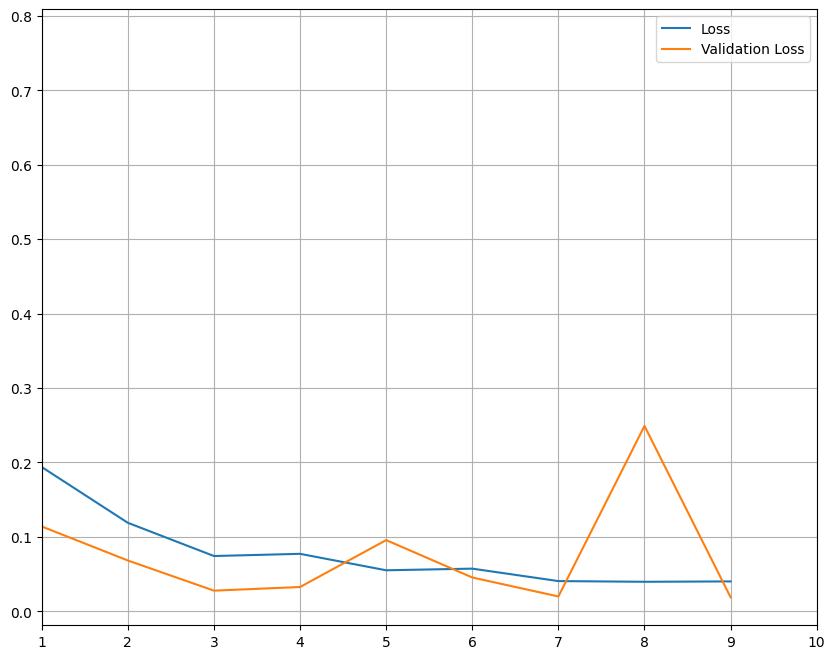

In [ ]:
losses_graph(densenet121_fit_results)

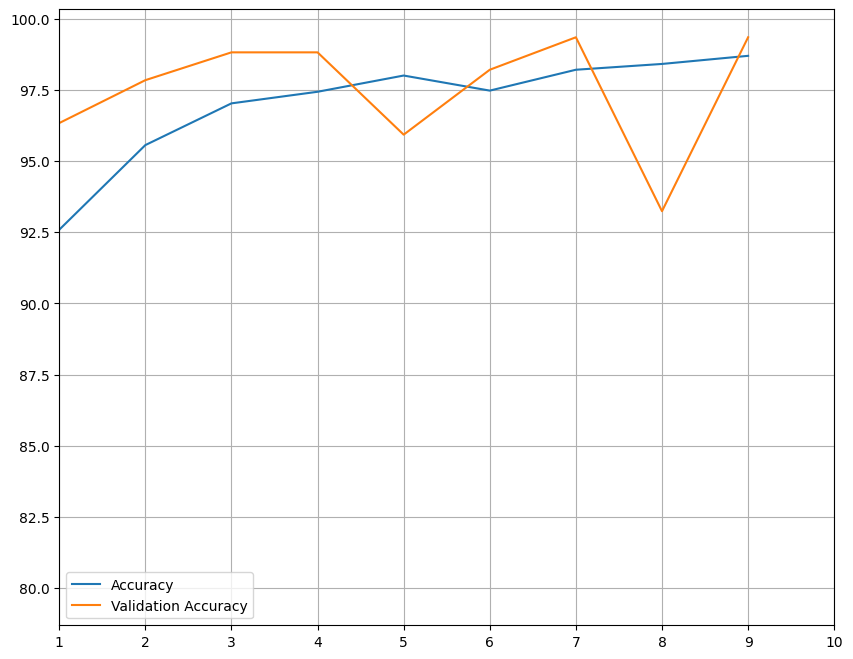

In [ ]:
accuracy_graph(densenet121_fit_results)

In [ ]:
#prediction with validation set
y_test, y_pred = [], []
for all_img, all_cancer_s in tqdm(pvall):
    all_img = all_img.to(device)
    all_outputs = densenet121(all_img)
    _, prediction = torch.max(all_outputs, dim = 1)
    y_test += all_cancer_s.tolist()
    y_pred += prediction.tolist()

  0%|          | 0/154 [00:00<?, ?it/s]

In [ ]:
#loss and accuracy metrics
loss, acc = vl_func(densenet121, pvall, nn.CrossEntropyLoss(), device)
print(f'training loss: {loss} - training accuracy: {acc}')

  0%|          | 0/154 [00:00<?, ?it/s]

training loss: 0.02113397979975433 - training accuracy: 0.9926680244399185


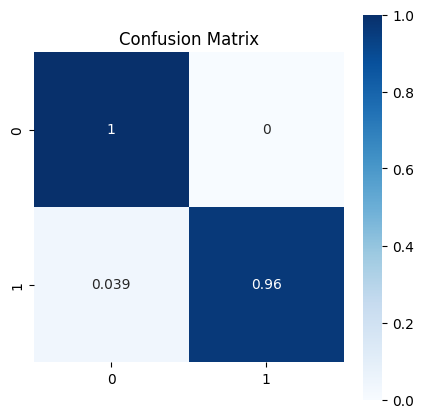

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred, normalize = 'true')
cm_df = pd.DataFrame(cm)
plt.figure(figsize=(5, 5))
plt.title('Confusion Matrix')
sns.heatmap(cm_df, annot=True, cmap='Blues', square=True);

In [ ]:
#f1 score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1941
           1       1.00      0.96      0.98       514

    accuracy                           0.99      2455
   macro avg       0.99      0.98      0.99      2455
weighted avg       0.99      0.99      0.99      2455



In [ ]:
#risk calculator
def display_question(question, choices):
    print(question)
    for i, choice in enumerate(choices, 1):
        print(f"{i}. {choice}")

def get_user_answer(choices):
    while True:
        try:
            user_answer = int(input("Select:"))
            if 1 <= user_answer <= len(choices):
                return user_answer
            else:
                print("This number is not among the options. Try again.")
        except ValueError:
            print("You selected incorrectly, please choose a number.")

def age_risk_factor(age):
    if age < 45:
        return 0
    elif 45 <= age <= 49:
        return 1
    elif 50 <= age <= 54:
        return 2
    elif 55 <= age <= 59:
        return 3
    elif 60 <= age <= 64:
        return 4
    else:
        return 5

def BMI_risk_factor(bmi):
    if bmi < 24.9:
        return 0
    elif 25 <= bmi <= 29.9:
        return 2
    elif 30 <= bmi <= 39.9:
        return 4
    else:
        return 5

def psa_risk_factor(age, optimal_value):
    if age < 50:
        if optimal_value == "less then 2.5 ng/ml or Unknown":
            return 0
        elif optimal_value == "between 2.5 ng/ml and 3.49 ng/ml":
            return 4
        elif optimal_value == "between 3.5 ng/ml and 4.49 ng/ml":
            return 8
        elif optimal_value == "between 4.5 ng/ml and 5.49 ng/ml":
            return 12
        elif optimal_value == "between 5.5 ng/ml and 6.5 ng/ml":
            return 16
        else:
            return 20
    elif 50 <= age < 59:
        if optimal_value == "less then 2.5 ng/ml or Unknown":
            return 0
        elif optimal_value == "between 2.5 ng/ml and 3.49 ng/ml":
            return 2
        elif optimal_value == "between 3.5 ng/ml and 4.49 ng/ml":
            return 4
        elif optimal_value == "between 4.5 ng/ml and 5.49 ng/ml":
            return 12
        elif optimal_value == "between 5.5 ng/ml and 6.5 ng/ml":
            return 16
        else:
            return 20
    elif 60 <= age < 69:
        if optimal_value == "less then 2.5 ng/ml or Unknown":
            return 0
        elif optimal_value == "between 2.5 ng/ml and 3.49 ng/ml":
            return 0
        elif optimal_value == "between 3.5 ng/ml and 4.49 ng/ml":
            return 2
        elif optimal_value == "between 4.5 ng/ml and 5.49 ng/ml":
            return 8
        elif optimal_value == "between 5.5 ng/ml and 6.5 ng/ml":
            return 16
        else:
            return 20
    else:
        if optimal_value == "less then 2.5 ng/ml or Unknown":
            return 0
        elif optimal_value == "between 2.5 ng/ml and 3.49 ng/ml":
            return 0
        elif optimal_value == "between 3.5 ng/ml and 4.49 ng/ml":
            return 0
        elif optimal_value == "between 4.5 ng/ml and 5.49 ng/ml":
            return 0
        elif optimal_value == "between 5.5 ng/ml and 6.5 ng/ml":
            return 8
        else:
            return 20


questions = {
    "What is patient age?:": {
        "input_type": "number",
        "process_input": age_risk_factor
    },
    "What is patient Ethnic Origin?": {
        "choices": ["Caribbean", "Southern Africa", "Middle Africa", "Western Africa", "Eastern Africa"
        , "South America", "Northern Europe", "Western Asia", "Oceania"
        , "Central America", "Central and Eastern Europe", "Western Europe", "Northern America"
        , "Southern Europe", "Northern Africa", "South-Eastern Asia"
        , "Eastern Asia", "South-Central Asia"],
        "risk_factors": [5, 5, 5, 5, 5
                         , 4, 4, 4, 4
                         , 3, 3, 3, 3
                         , 2, 2, 2
                         , 1, 1]
    },
    "Family Prostate Cancer History Status:": {
        "choices": ["Relatives have not been diagnosed with prostate cancer, or family history is not known."
        ,"At least one first-degree relative has been diagnosed with prostate cancer"
        , "At least one second-degree relative has been diagnosed with prostate cancer"
        , "At least one third-degree relative has been diagnosed with prostate cancer."],
        "risk_factors": [0, 10, 5, 1]
    },
    "BRCA2 gene mutation status:": {
        "choices": ["Yes", "No or Unknown"],
        "risk_factors": [5, 0]
    },
    "HPC1 gene mutation status:": {
        "choices": ["Yes", "No or Unknown"],
        "risk_factors": [5, 0]
    },
    "Consumption of animal-based fat and vegetable-based fat in the diet:": {
        "choices": ["Low", "Moderate", "High"],
        "risk_factors": [0, 2, 5]
    },
    "Consumption of red meat in the diet:": {
        "choices": ["Low", "Moderate", "High"],
        "risk_factors": [0, 2, 5]
    },
    "Consumption of calcium, milk and dairy products in the diet:": {
        "choices": ["Low", "Moderate", "High"],
        "risk_factors": [0, 2, 5]
    },
    "Consumption of food containing sufficient Vitamins and Minerals in the diet:": {
        "choices": ["Low", "Moderate", "High"],
        "risk_factors": [3, 1, 0]
    },
    "Alcohol consumption in the diet:": {
        "choices": ["Low-Moderate", "High"],
        "risk_factors": [0, 2]
    },
    "Coffee consumption in the diet:": {
        "choices": ["Low", "Moderate-High"],
        "risk_factors": [0, -2]
    },
    "Body Mass Index (BMI):": {
        "input_type": "number",
        "process_input": BMI_risk_factor
    },
    "Physical Activity:": {
        "choices": ["Low", "Moderate", "High"],
        "risk_factors": [5, 0, -5]
    },
    "Cigarette smoking:": {
        "choices": ["Low", "Moderate", "High"],
        "risk_factors": [0, 2, 5]
    },
    "Sexually transmitted disease status:": {
        "choices": ["No or Unknown", "Yes"],
        "risk_factors": [0, 5]
    },
    "Digital Rectal Examination (DRE) Result:": {
        "choices": ["Normal or Unknown", "Asymmetric Lobe", "Hard or lumpy"],
        "risk_factors": [0, 5, 10]
    },
    "What is your PSA test result?:": {
        "input_type": "optimal_value",
        "choices": ["less then 2.5 ng/ml or Unknown", "between 2.5 ng/ml and 3.49 ng/ml", "between 3.5 ng/ml and 4.49 ng/ml", "between 4.5 ng/ml and 5.49 ng/ml", "between 5.5 ng/ml and 6.5 ng/ml", "more than 6.5 ng/ml"],
        "process_input": psa_risk_factor
    }
}


risk_score = 0
age = None

for question, data in questions.items():
    if data.get("input_type") == "number":
        while True:
            try:
                age = int(input(f"{question}: "))
                risk_score += data["process_input"](age)
                break
            except ValueError:
                print("You selected incorrectly, please choose a number.")
    elif data.get("input_type") == "optimal_value":
        choices = data["choices"]
        display_question(question, choices)
        user_answer = get_user_answer(choices)
        optimal_value = choices[user_answer - 1]
        risk_score += data["process_input"](age, optimal_value)
    else:
        choices = data["choices"]
        risk_factors = data["risk_factors"]

        display_question(question, choices)
        user_answer = get_user_answer(choices)
        risk_score += risk_factors[user_answer - 1]

risk_score = min(risk_score, 100)

print(f"Prostate cancer risk is %{risk_score}.")
if risk_score < 30:
    print("Low risk.")
elif 30 <= risk_score <= 60:
    print("Moderate risk.")
else:
    print("High risk.")

What is patient age?:: 70
What is patient Ethnic Origin?
1. Caribbean
2. Southern Africa
3. Middle Africa
4. Western Africa
5. Eastern Africa
6. South America
7. Northern Europe
8. Western Asia
9. Oceania
10. Central America
11. Central and Eastern Europe
12. Western Europe
13. Northern America
14. Southern Europe
15. Northern Africa
16. South-Eastern Asia
17. Eastern Asia
18. South-Central Asia
Select:1
Family Prostate Cancer History Status:
1. Relatives have not been diagnosed with prostate cancer, or family history is not known.
2. At least one first-degree relative has been diagnosed with prostate cancer
3. At least one second-degree relative has been diagnosed with prostate cancer
4. At least one third-degree relative has been diagnosed with prostate cancer.
Select:2
BRCA2 gene mutation status:
1. Yes
2. No or Unknown
Select:1
HPC1 gene mutation status:
1. Yes
2. No or Unknown
Select:1
Consumption of animal-based fat and vegetable-based fat in the diet:
1. Low
2. Moderate
3. High


In [ ]:
#False
#image_path = "/content/test_t2_cor/test_t2_tse_cor_dcm/2098.dcm.png"
#True
#image_path = "/content/test_t2_cor/test_t2_tse_cor_dcm/1030.dcm.png"

In [ ]:
# mr classification
from PIL import Image

def denormalize(tensor, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]):
    mean = torch.tensor(mean).unsqueeze(1).unsqueeze(2)
    std = torch.tensor(std).unsqueeze(1).unsqueeze(2)
    return tensor * std + mean

def predict_image(image_path, model):
    # Define the transformation
    transform = T.Compose([
        T.Resize(size),
        T.ToTensor(),  # Convert the image to an array
        T.Normalize(*imagn_std),  # Normalize the image
    ])

    # Open the image file
    img = Image.open(image_path).convert("RGB")

    # Apply the transformations to the image
    img_t = transform(img)

    img_denorm = denormalize(img_t.clone().detach()).clamp_(0, 1)

    # Convert the 2D image to 1D vector
    img_u = torch.unsqueeze(img_t, 0)

    # Move the input to the appropriate device
    img_u = img_u.to(device)

    # Use the model to predict the class
    resnet18.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Turn off gradients, we don't need them for prediction
        output = resnet18(img_u)

    # Get the predicted class
    _, predicted = torch.max(output, 1)

    if predicted.item() == 0:
      print("Low Risk")
    else:
      print("High Risk")


    #return predicted.item()
    return img_denorm

High Risk


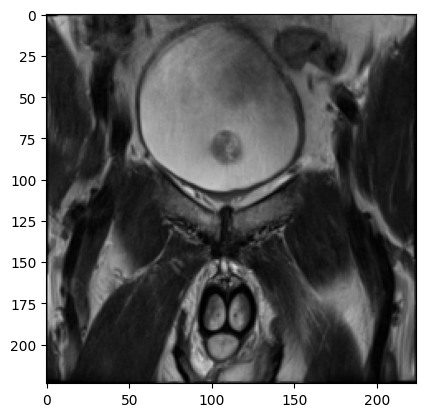

In [ ]:
image_path = "/content/test_t2_cor/test_t2_tse_cor_dcm/1030.dcm.png"
img_denorm = predict_image(image_path, densenet121)
plt.imshow(img_denorm.permute(1, 2, 0))
plt.show()

Low Risk


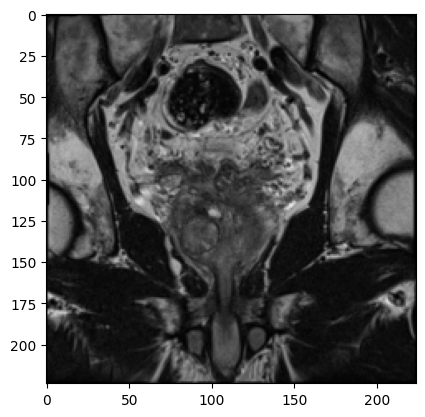

In [ ]:
image_path = "/content/test_t2_cor/test_t2_tse_cor_dcm/2098.dcm.png"
img_denorm = predict_image(image_path, densenet121)
plt.imshow(img_denorm.permute(1, 2, 0))
plt.show()